In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#pelec = pd.read_csv('Pelec.csv')
pelec_0to500 = pd.read_csv('Pelec_0to500.csv')
pelec_250to500_block_cor_setsize = pd.read_csv('Pelec_250to500_block_cor_setsize.csv')

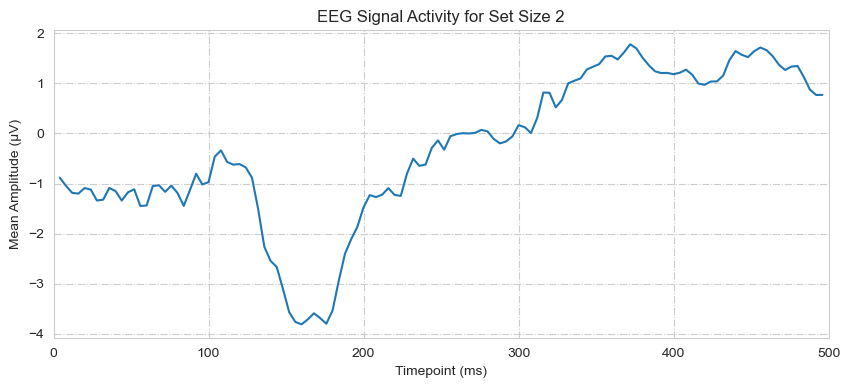

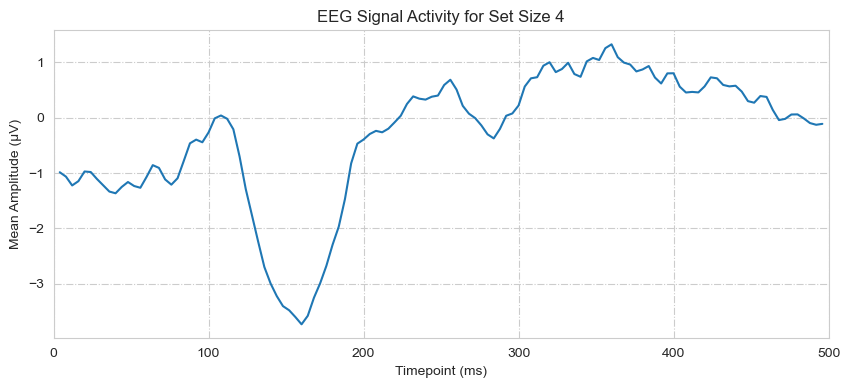

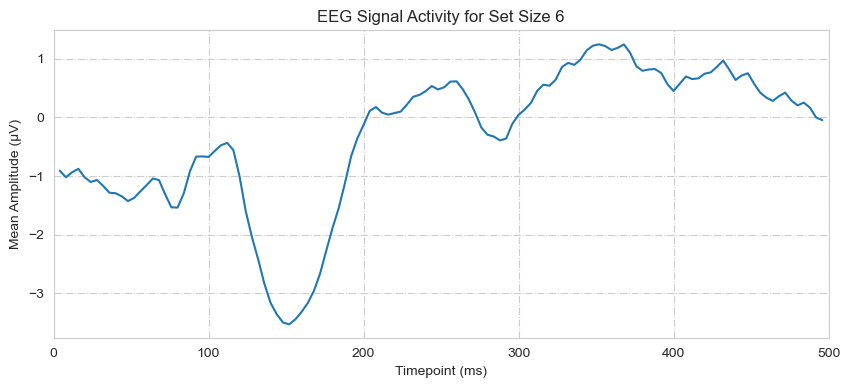

In [3]:
# Define the set sizes
set_sizes = [2, 4, 6]

# Create individual plots for each condition
for set_size in set_sizes:
    # Filter data for the specific set size
    subset_data = pelec_0to500[pelec_0to500['setsize'] == set_size]
    
    # Group by timepoint and calculate the mean amplitude
    mean_amplitude = subset_data.groupby('timepoint')['mval'].mean()
    
    # Plot the mean amplitude
    plt.figure(figsize=(10, 4))
    sns.set_style('whitegrid')
    plt.plot(mean_amplitude)
    plt.title(f'EEG Signal Activity for Set Size {set_size}')
    plt.xlabel('Timepoint (ms)')
    plt.ylabel('Mean Amplitude (µV)')
    plt.xlim(0, 500)
    #plt.axvline(x=250, color='r', linestyle='--', label='P300 Window Start')
    #plt.axvline(x=500, color='g', linestyle='--', label='P300 Window End')
    #plt.legend()
    plt.grid(True, linestyle='-.')
    #plt.savefig(f'EEGActivity{set_size}.png', dpi=300, bbox_inches='tight')
    plt.show()


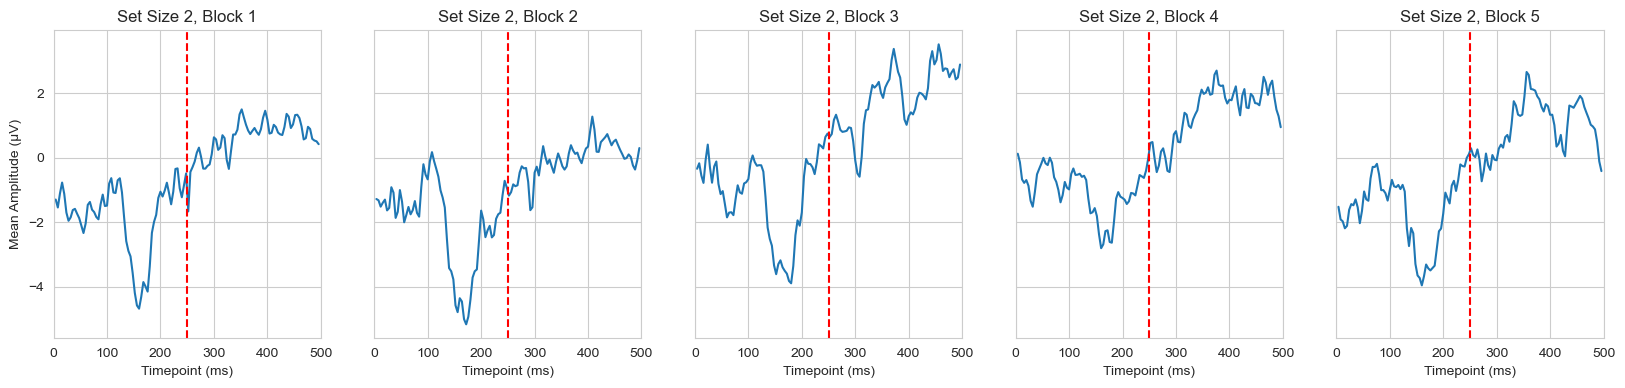

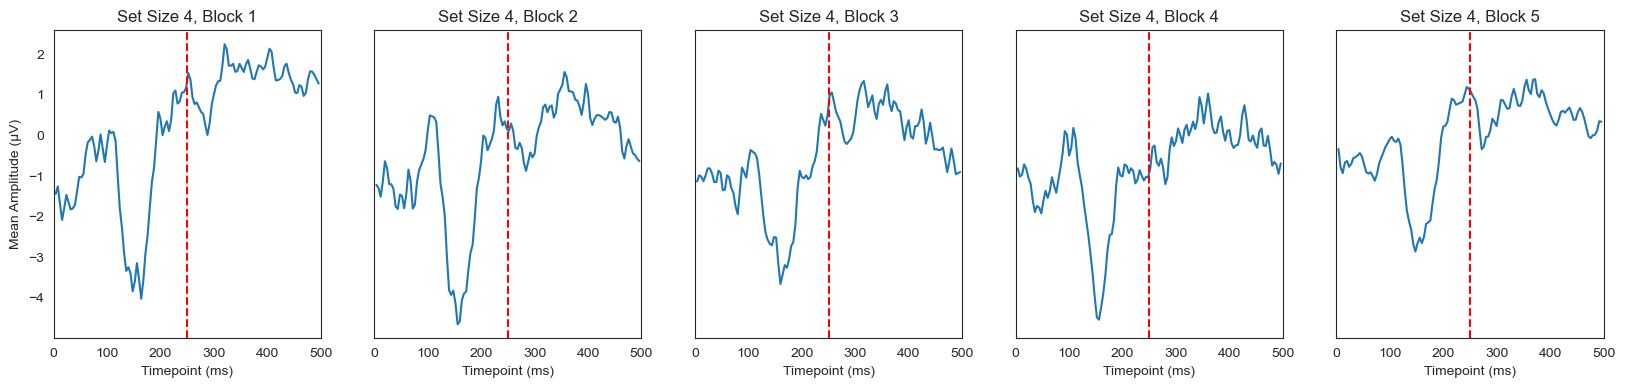

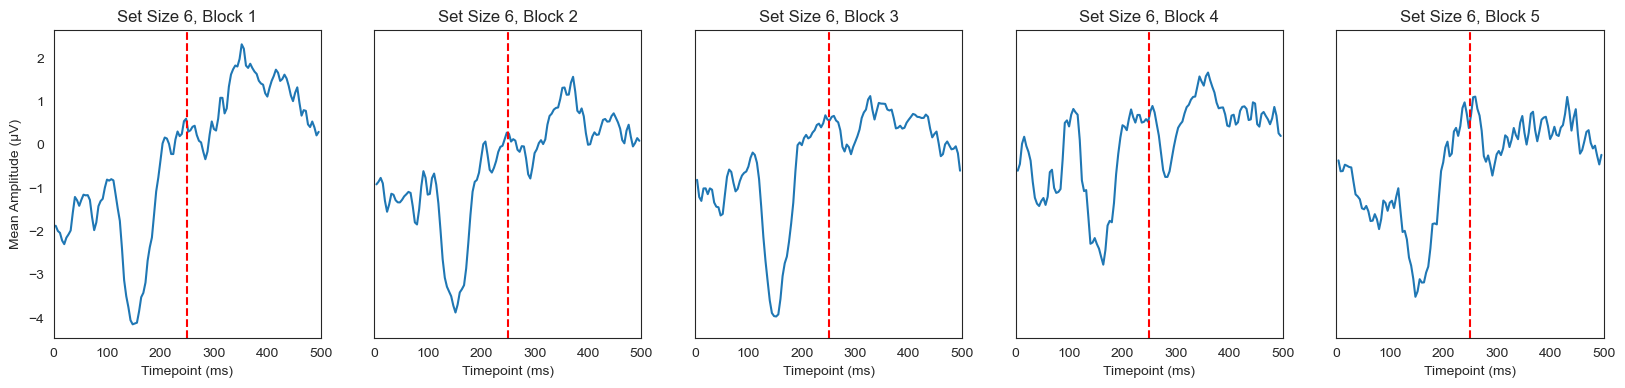

In [4]:
# Define the number of blocks
num_blocks = 5

# Create individual plots for each condition with 5 subplots for each block
for set_size in set_sizes:
    # Create a figure with 5 subplots
    fig, axes = plt.subplots(nrows=1, ncols=num_blocks, figsize=(20, 4), sharey=True)
    sns.set_style('white')
    

    
    # Iterate through the blocks
    for block in range(1, num_blocks + 1):
        # Filter data for the specific set size and block
        pelec_subset = pelec_0to500[(pelec_0to500['setsize'] == set_size) & (pelec_0to500['block'] == block)]
        
        # Group by timepoint and calculate the mean amplitude
        pelec_mean_amp = pelec_subset.groupby('timepoint')['mval'].mean()
        
        # Plot the mean amplitude in the corresponding subplot
        axes[block - 1].plot(pelec_mean_amp)
        axes[block - 1].set_title(f'Set Size {set_size}, Block {block}')
        axes[block - 1].set_xlabel('Timepoint (ms)')
        axes[block - 1].set_xlim(0, 500)
        axes[block - 1].axvline(x=250, color='r', linestyle='--')
        #axes[block - 1].axvline(x=500, color='g', linestyle='--')
    
    # Set a common y-label
    axes[0].set_ylabel('Mean Amplitude (µV)')
    plt.show()


----------

In [5]:
p300_data = pelec_250to500_block_cor_setsize

p300_overall = p300_data['mval'].mean()

#1 Overall Analysis
print(f'The overall mean P300 amplitude across all conditions and blocks is approximately {p300_overall:.3f}\u03BCV.')

The overall mean P300 amplitude across all conditions and blocks is approximately 0.651μV.


### 2. Condition-wise Analysis

Analyze the mean P300 amplitude for each set size (2, 4, and 6) across blocks. Then calculate the mean amplitude for each condition and create a plot to visualize the results.

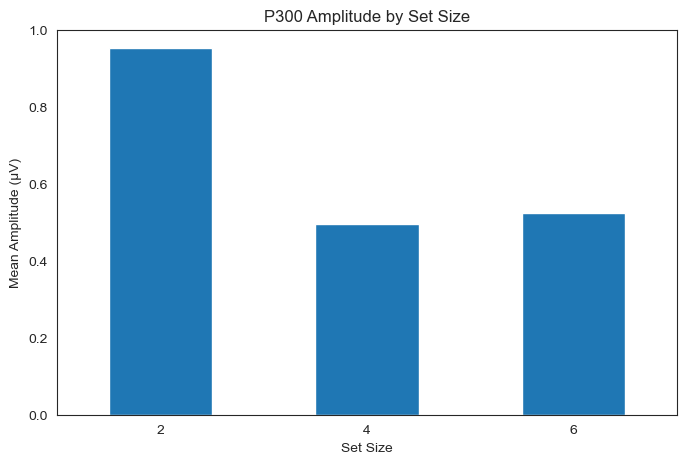

setsize
2    0.953396
4    0.496327
6    0.524498
Name: mval, dtype: float64

In [6]:
# Group the data by set size and calculate the mean P300 amplitude for each condition
p300_condition = p300_data.groupby('setsize')['mval'].mean()

# Plot the mean P300 amplitude for each condition
p300_condition.plot(kind='bar', figsize=(8, 5))
plt.title('P300 Amplitude by Set Size')
plt.xlabel('Set Size')
plt.ylabel('Mean Amplitude (\u03BCV)')
plt.xticks(rotation=0)
#plt.savefig('P3ampSS.png', dpi=300, bbox_inches='tight')
plt.show()

# Return the mean P300 amplitude for each condition
p300_condition


### 3. Correct vs Incorrect Analysis:

Next, we'll analyze the mean P300 amplitude for correct and incorrect trials for each condition and block. We'll create corresponding plots to visualize the results for each set size condition

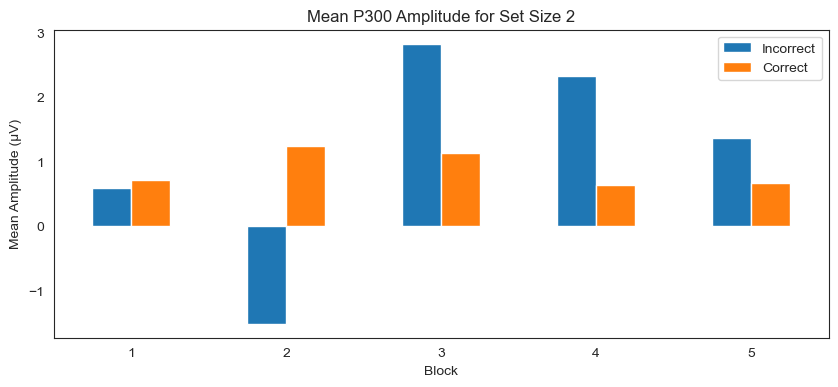

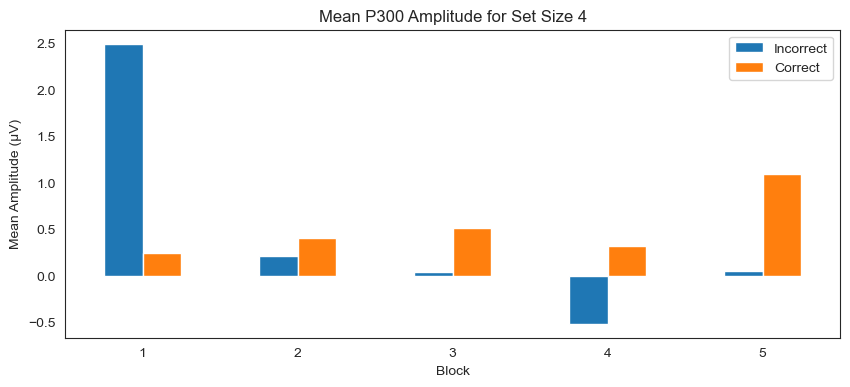

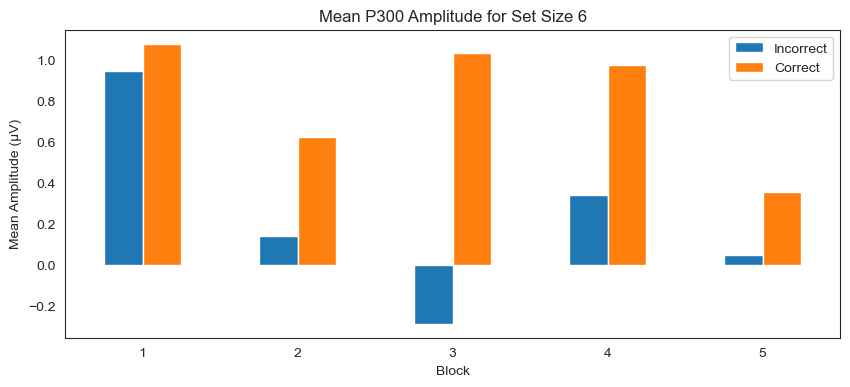

In [7]:
# Iterate through the set sizes and analyze the mean P300 amplitude for correct and incorrect trials
for set_size in set_sizes:
    
    # Filter data for the specific set size
    p300_setsize = p300_data[p300_data['setsize'] == set_size]
    
    # Group by block and correctness, and calculate the mean amplitude
    p300_mean_BlockCor = p300_setsize.groupby(['block', 'cor'])['mval'].mean().unstack()
    
    # Plot the mean amplitude for correct and incorrect trials
    p300_mean_BlockCor.plot(kind='bar', figsize=(10, 4), title=f'Mean P300 Amplitude for Set Size {set_size}')
    plt.xlabel('Block')
    plt.ylabel('Mean Amplitude (µV)')
    plt.xticks(rotation=0)
    plt.legend(["Incorrect", "Correct"])
    plt.show()


### Above plots are irrelevant use the plot below

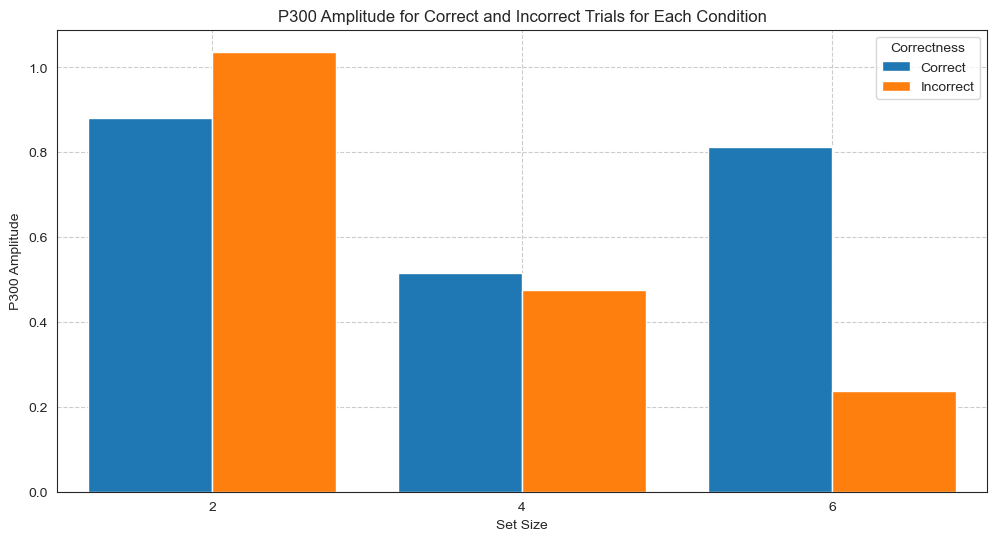

In [8]:
sns.set_style('white')
# Map the correctness values to labels
p300_data['correctness_label'] = p300_data['cor'].map({0: 'Incorrect', 1: 'Correct'})

# Calculate the mean P300 amplitude for each set size and correctness, averaged across all blocks and participants
mean_p300_data = p300_data.groupby(['setsize', 'correctness_label'])['mval'].mean().reset_index()

# Plot the mean P300 amplitude for correct and incorrect trials for each set size condition
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_p300_data, x='setsize', y='mval', hue='correctness_label', saturation=1)
plt.title('P300 Amplitude for Correct and Incorrect Trials for Each Condition')
plt.xlabel('Set Size')
plt.ylabel('P300 Amplitude')
plt.legend(title='Correctness')
plt.grid(True, linestyle='--')
#plt.savefig('corrP3.png', dpi=300, bbox_inches='tight')
plt.show()


# P300 Amplitude

---- 

### Hypothesis 1: P300 amplitude is higher for correct trials than for incorrect trials.
### Hypothesis 2: P300 amplitude shows a gradual decline as a function of block number.

----

## Hypothesis 1: P300 Amplitude Is Higher for Correct Than Incorrect Trials for Each Set Size
- **Aim**: To test whether the P300 amplitude is higher for correct trials than for incorrect trials on each set size
- **Factor**: Correctness (correct vs incorrect trials), Condition (2, 4, and 6 set-sizes)
- **Analysis**: Main effect of correctness in the 2-way ANOVA


----

### Analysis Plan:
- **Dependent Variable**: P300 Amplitude (mean amplitude within the 250 to 500 ms time window)
- **Independent Variable**: Correctness (correct vs. incorrect trials)
- **Grouping Variable**: Set Size (2, 4, 6)
- **Statistical Test**: Two-Way Repeated Measures ANOVA with Set Size and Correctness as within-subject factors
- **Within-Subject Factors**: Correctness (correct or incorrect) and Set Size (set sizes 2, 4, and 6)
- **Main Effects**: Correctness, Set Size
- **Interaction Effect**: Correctness × Set Size

In [9]:
import pingouin as pg

# Perform a two-way repeated measures ANOVA with correctness and set size as within-subject factors
two_way_anova_result = pg.rm_anova(dv='mval', within=['cor', 'setsize'], subject='subj', data=p300_data)

# Print the summary of the ANOVA result
two_way_anova_result



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,cor,0.124131,1,13,0.124131,0.082170,0.778896,0.778896,0.000332,1.000000
1,setsize,1.566235,2,26,0.783117,0.217681,0.805833,0.724003,0.004177,0.690619
2,cor * setsize,3.780779,2,26,1.890390,0.780753,0.468506,0.421507,0.010024,0.647933



### Results for Hypothesis 1:

1. **Correctness (cor)**:
   - **F(1, 13) = 0.0822, p = 0.7789**
   - There is no significant main effect of correctness on the P300 amplitude. This means that the data does not support the hypothesis that the P300 amplitude is significantly higher for correct trials compared to incorrect trials.

2. **Set Size (setsize)**:
   - **F(2, 26) = 0.2177, p = 0.8058**
   - There is no significant main effect of set size on the P300 amplitude. This indicates that the data does not show a significant difference in P300 amplitude across the different set sizes.

3. **Interaction (cor * setsize)**:
   - **F(2, 26) = 0.7808, p = 0.4685**
   - There is no significant interaction between correctness and set size. This means that the effect of correctness on P300 amplitude does not significantly vary across different set sizes.

### Conclusion:
The results do not provide evidence to support the revised hypothesis that the P300 amplitude is higher for correct than incorrect trials for each set size condition. Both the main effects and the interaction were found to be non-significant.

## Hypothesis 2: P300 amplitude shows a gradual decline across each set size as a function of block number
- **Aim**: To test wether P300 amplitude shows a gradual decline across each set size as a function of block number.
- **Factor**: Block (block number), Set Size (condition)
- **Analysis**: Main effect of block in the 2-way ANOVA

### Variables and Factors:
1. **Dependent Variable**: P300 Amplitude
   - The mean amplitude of the P300 component within the time window of 250 to 500 ms.
   - This variable represents the response or outcome we are analyzing.

2. **Within-Subject Factors**:
   - **Set-size (condition)**: The number of colored sqaures show on the trial.
     - Levels: 2, 4, and 6
   - **Block (block)**: Block number in the experiment.
     - Levels: 1, 2, 3, 4, and 5

### Main Effects and Interactions:
- **Main Effect of Block**: Examines whether the P300 amplitude changes as a function of block number.
- **Main Effect of Condition**: Examines wether the P300 amplitude varies with set-size.
- **Interaction Effect (Condition × Block)**: Examines whether the effect of condition on P300 amplitude varies across blocks.


In [11]:
from statsmodels.stats.anova import AnovaRM
# Calculate the mean P300 amplitude for each participant, set size, and block
anova_hyp2 = pelec_250to500_block_cor_setsize.groupby(['subj', 'setsize', 'block'])['mval'].mean().reset_index()

# Perform a two-way repeated measures ANOVA with set size and block as within-subject factors
anova_result_2 = AnovaRM(anova_hyp2, 'mval', 'subj', within=['setsize', 'block']).fit()

# Summary of the two-way ANOVA result
anova_result_2.summary()


,F Value,Num DF,Den DF,Pr > F
setsize,0.8557,2.0000,28.0000,0.4358
block,0.4987,4.0000,56.0000,0.7367
setsize:block,0.9225,8.0000,112.0000,0.5009


#### Main Effect of Set Size:
- **Set Size Effect**: \( F(2, 28) = 0.8557, p = 0.4358 \)
  - **Interpretation**: The analysis did not find a statistically significant difference in P300 amplitude across the set sizes (2, 4, 6). This indicates that the mean amplitude of the P300 component did not vary significantly based on the set size condition.

#### Main Effect of Block:
- **Block Effect**: \( F(4, 56) = 0.4987, p = 0.7367 \)
  - **Interpretation**: The analysis did not find a statistically significant change in P300 amplitude across blocks 1 to 5. This indicates that the mean amplitude of the P300 component did not vary significantly across the five blocks.

#### Interaction Effect: Set Size × Block:
- **Set Size × Block Interaction**: \( F(8, 112) = 0.9225, p = 0.5009 \)
  - **Interpretation**: The interaction between set size and block is not significant. This result suggests that the relationship between set size and P300 amplitude does not vary significantly across blocks.

### Summary:
The 2-way repeated measures ANOVA did not reveal significant effects of set size or block number on the P300 amplitude within the time window of 250 to 500 ms. The findings suggest that neither the set size condition nor the progression of blocks significantly influenced the P300 amplitude in this dataset. Specifically, the analysis did not support the hypothesis that the P300 amplitude shows a gradual decline across each set size as a function of block number. These results contribute to the understanding of how different task-related factors may or may not influence the P300 component in the change detection task.

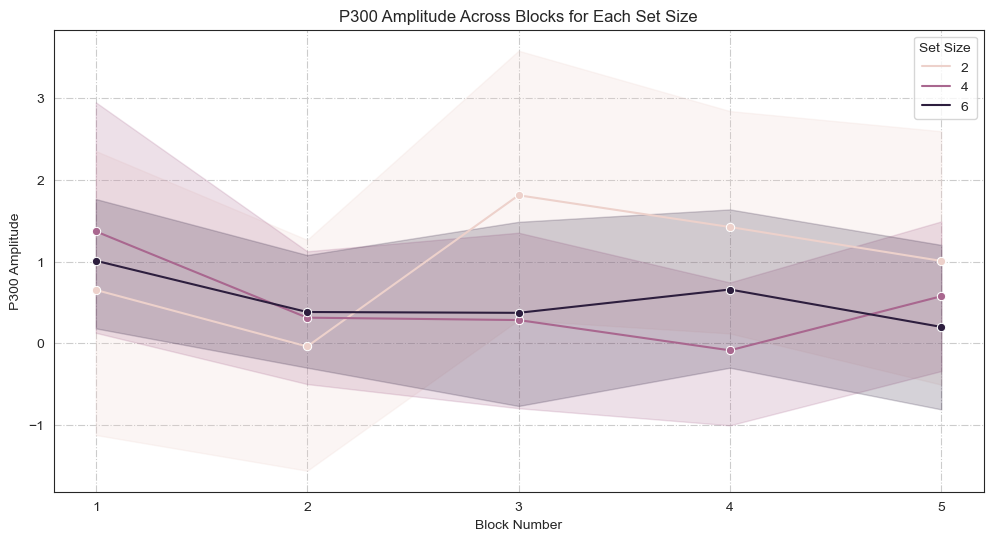

In [12]:
plt.figure(figsize=(12, 6))
sns.set_style('white')
sns.lineplot(data=p300_data, x='block', y='mval', hue='setsize', marker='o')
plt.title('P300 Amplitude Across Blocks for Each Set Size')
plt.xlabel('Block Number')
plt.ylabel('P300 Amplitude')
plt.xticks([1,2,3,4,5], rotation=0)
plt.legend(title='Set Size')
plt.grid(True, linestyle='-.')
#plt.savefig('p3Hyp2.png', dpi=300, bbox_inches='tight')
plt.show()


---

# P300 latency

In [13]:
# Filter the data to include only the time window of 250 to 500 ms
p300_latency = pelec_0to500[(pelec_0to500['timepoint'] >= 250) & (pelec_0to500['timepoint'] <= 500)]

# Group the data by set size, block, and time point, and calculate the mean amplitude for each group
p300_latency_mean = p300_latency.groupby(['setsize', 'block', 'timepoint'])['mval'].mean().reset_index()

# Identify the time point at which the P300 amplitude is at its maximum for each set size and block (P300 latency)
p300_latency_peak = p300_latency_mean.loc[p300_latency_mean.groupby(['setsize', 'block'])['mval'].idxmax()]

# Rename the columns for clarity
p300_latency_peak.rename(columns={'timepoint': 'P300_latency', 'mval': 'P300_peak_amplitude'}, inplace=True)

# Display the P300 latency for each set size and block
p300_latency_peak[['setsize', 'block', 'P300_latency', 'P300_peak_amplitude']]


,setsize,block,P300_latency,P300_peak_amplitude
25,2,1,352,1.493572
101,2,2,408,1.268970
175,2,3,456,3.508593
217,2,4,376,2.694788
274,2,5,356,2.651993
327,4,1,320,2.247180
398,4,2,356,1.566018
450,4,3,316,1.342967
523,4,4,360,1.033408
588,4,5,372,1.389270


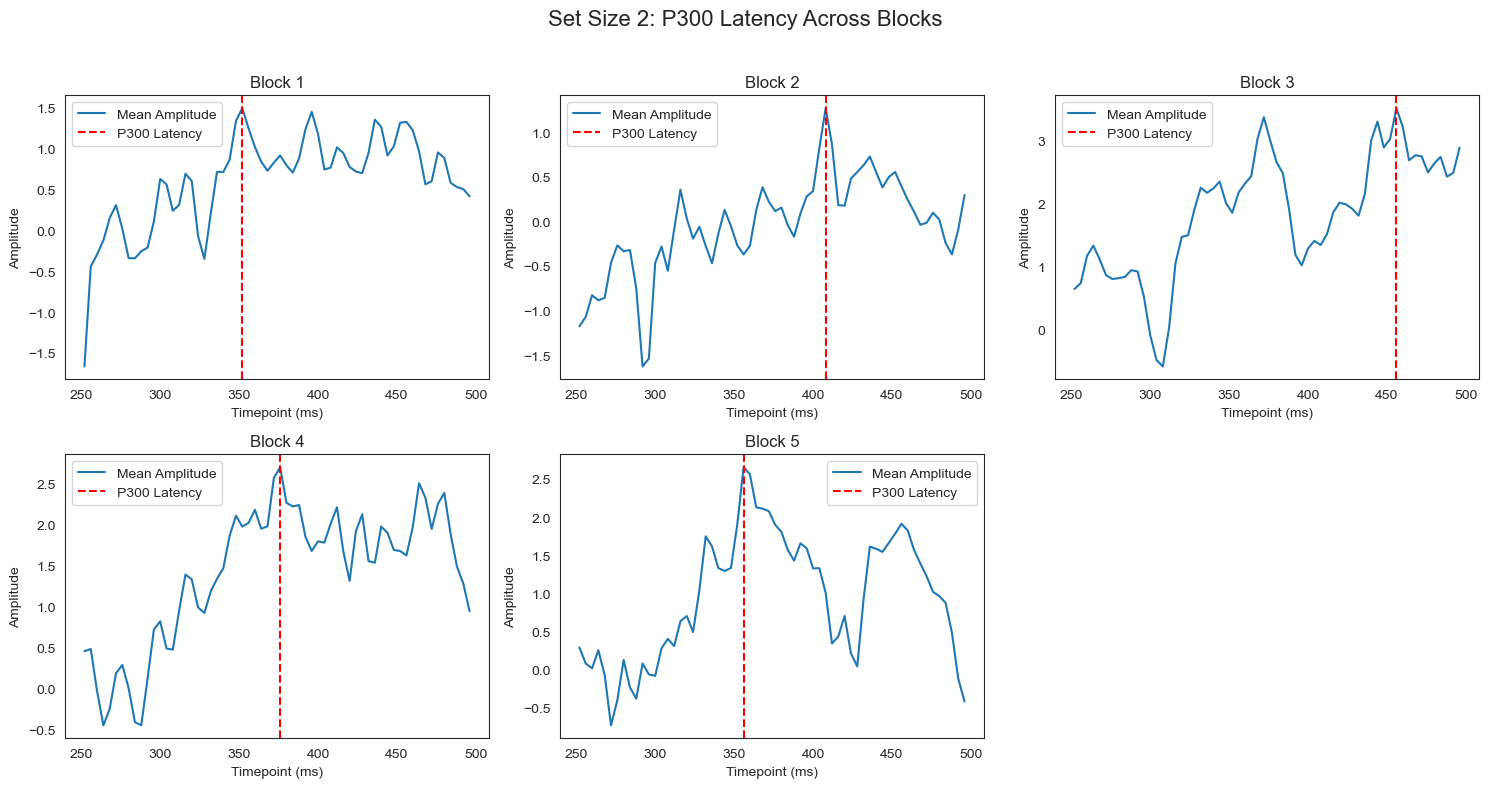

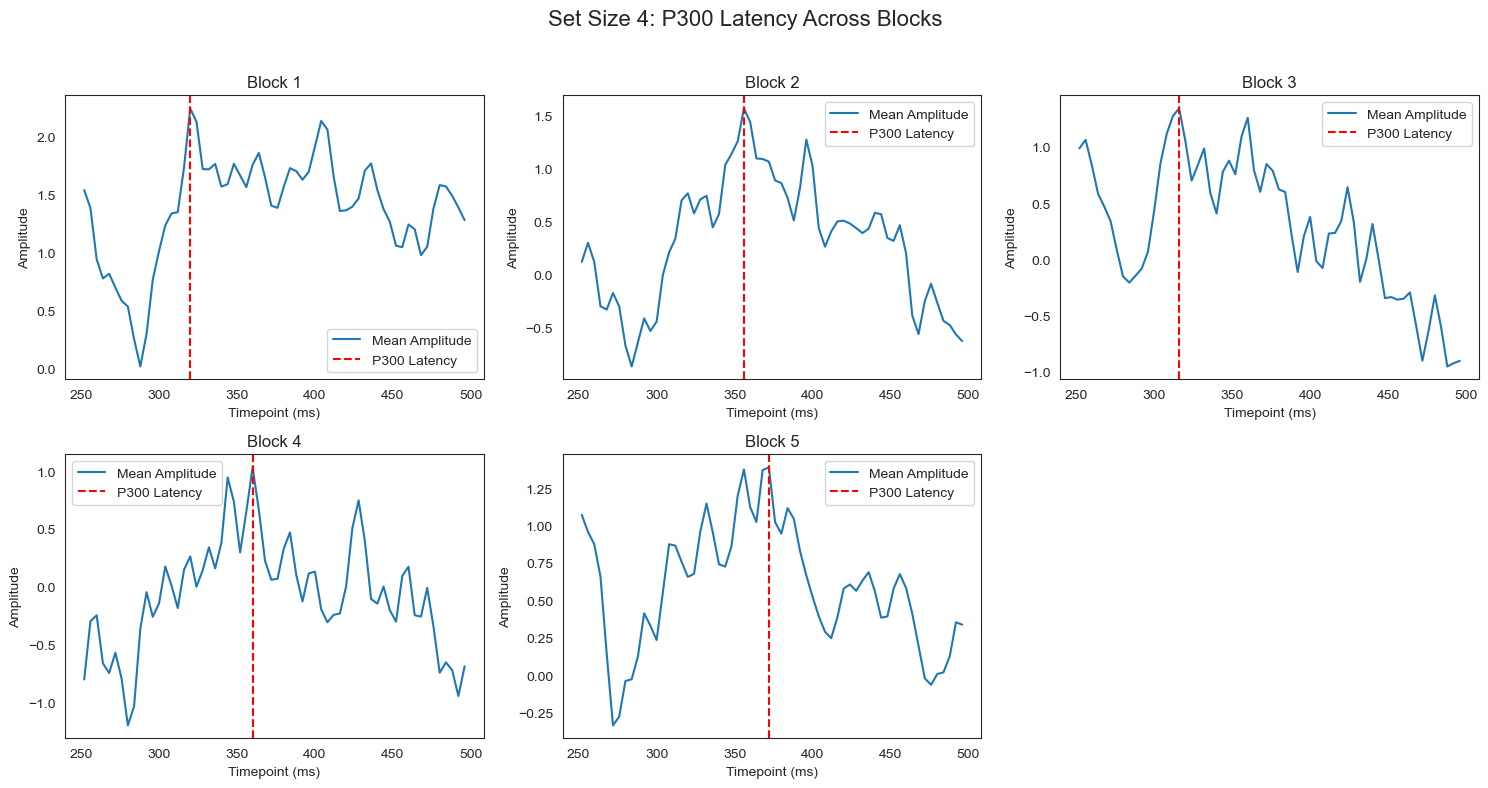

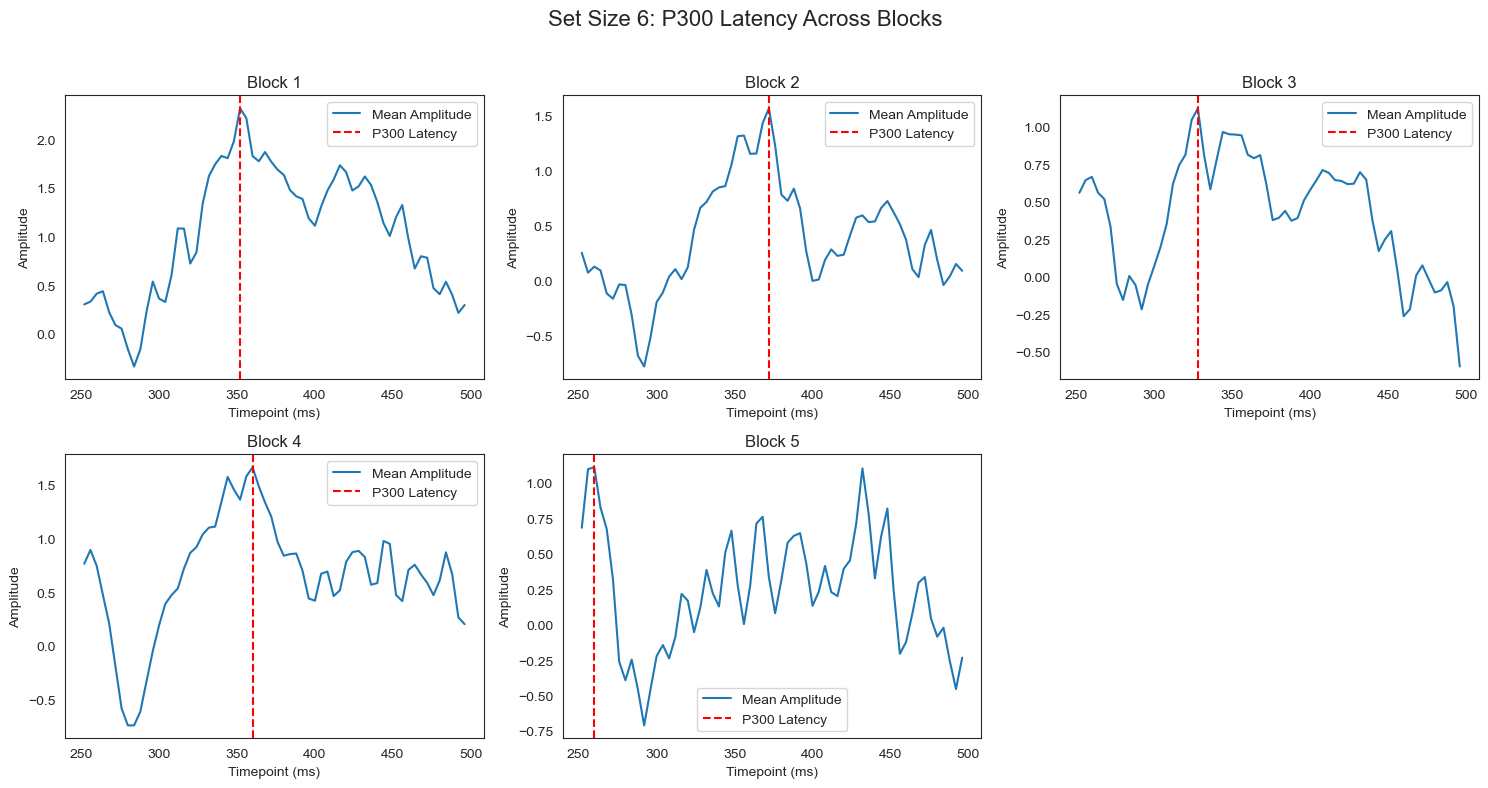

In [14]:
# Define set sizes and blocks
set_sizes = p300_latency_peak['setsize'].unique()
blocks = p300_latency_peak['block'].unique()

# Create separate plots for each set size
for set_size in set_sizes:
    plt.figure(figsize=(15, 8))
    plt.suptitle(f'Set Size {set_size}: P300 Latency Across Blocks', fontsize=16)
    
    # Create subplots for each block
    for block in blocks:
        plt.subplot(2, 3, block)
        block_data = p300_latency_mean[(p300_latency_mean['setsize'] == set_size) & (p300_latency_mean['block'] == block)]
        plt.plot(block_data['timepoint'], block_data['mval'], label='Mean Amplitude')
        peak_latency = p300_latency_peak[(p300_latency_peak['setsize'] == set_size) & (p300_latency_peak['block'] == block)]['P300_latency'].values[0]
        plt.axvline(x=peak_latency, color='r', linestyle='--', label='P300 Latency')
        plt.xlabel('Timepoint (ms)')
        plt.ylabel('Amplitude')
        plt.title(f'Block {block}')
        plt.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In each plot, the blue line represents the mean amplitude across the time window from 250 to 500 ms, and the red dashed line indicates the P300 latency (time point of peak amplitude).

---

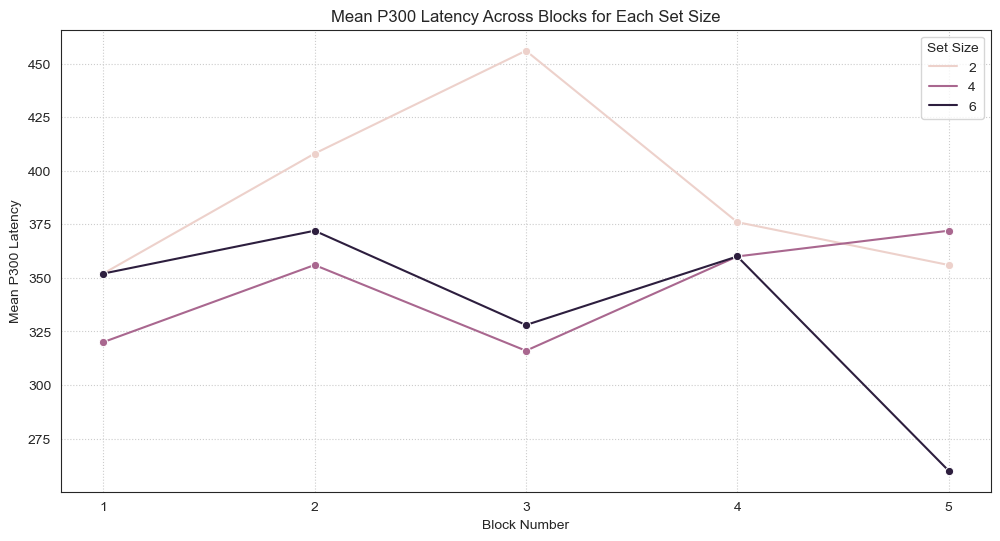

In [15]:
# Assuming 'latency_data' is the DataFrame containing the P300 latency information
plt.figure(figsize=(12, 6))
sns.lineplot(data=p300_latency_peak, x='block', y='P300_latency', hue='setsize', marker='o')
plt.title('Mean P300 Latency Across Blocks for Each Set Size')
plt.xlabel('Block Number')
plt.ylabel('Mean P300 Latency')
plt.legend(title='Set Size')
plt.xticks([1,2,3,4,5])
plt.grid(True, linestyle=':')
#plt.savefig('P3Lat.png', dpi=1200, bbox_inches='tight')
plt.show()


To test the hypothesis that P300 latency increases as a function of block number for each set size, I use a linear regression analysis. Specifically, I have performed a separate linear regression for each set size, with block number as the independent variable and P300 latency as the dependent variable.

Approach:

1. **Data Preparation**: Organize the data into separate subsets for each set size, with block number and P300 latency as variables.
2. **Linear Regression Analysis**: Perform a linear regression analysis for each set size to assess the relationship between block number and P300 latency.
3. **Interpret Results**: Examine the slope and significance of the regression to determine whether there is evidence that P300 latency increases with block number for each set size.

In [18]:
# Importing the necessary library for linear regression
from statsmodels.formula.api import ols
import pandas as pd

# Initialize a list to store the regression results
regression_results = []

# Perform linear regression for each set size
for set_size in set_sizes:
    # Subset the data for the specific set size
    subset_data = p300_latency_peak[p300_latency_peak['setsize'] == set_size]
    
    # Perform linear regression with block as the independent variable and P300_latency as the dependent variable
    regression_model = ols('P300_latency ~ block', data=subset_data).fit()
    
    # Get the slope, intercept, and p-value for the block coefficient
    slope = regression_model.params['block']
    intercept = regression_model.params['Intercept']
    p_value = regression_model.pvalues['block']
    
    # Store the results in a dictionary
    result_dict = {'Set Size': set_size, 'Slope': slope, 'Intercept': intercept, 'p-value': p_value}
    
    # Append the dictionary to the list
    regression_results.append(result_dict)

# Create a DataFrame from the list of results
regression_results_df = pd.DataFrame(regression_results)

# Display the regression results
regression_results_df


,Set Size,Slope,Intercept,p-value
0,2,-2.4,396.8,0.888378
1,4,10.8,312.4,0.208846
2,6,-19.6,393.2,0.192762


#### Set Size 2:
- **Slope**: -2.4 (negative slope)
- **Intercept**: 396.8 ms
- **p-value**: 0.8884 (not significant)

#### Set Size 4:
- **Slope**: 10.8 (positive slope)
- **Intercept**: 312.4 ms
- **p-value**: 0.2088 (not significant)

#### Set Size 6:
- **Slope**: -19.6 (negative slope)
- **Intercept**: 393.2 ms
- **p-value**: 0.1928 (not significant)

### Summary:
The results of the linear regression analysis do not provide significant evidence to support the hypothesis that P300 latency increases as a function of block number for any of the set sizes. The slopes for set sizes 2 and 6 are negative, and the p-values are not significant for any set size.

These findings suggest that, within the data analyzed, there is no systematic increase in P300 latency across blocks for the given set sizes.
